In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train/Test Split

In [12]:
train_data = pd.read_csv('PCC.individual.project.data.csv')
test_data = pd.read_csv('PCC.testing.data.csv')

In [13]:
def get_risk(patient):
    if patient.death == 1 and patient.time < 365:
        # Patient is high risk
        return 1
    elif patient.death == 0 and patient.time > 730:
        # Patient is low risk
        return 0
    else:
        # Patient needs to be dropped, insufficient data
        return 'drop'

In [14]:
train_data.apply(get_risk, axis=1)

0       drop
1       drop
2          1
3          1
4       drop
        ... 
1595    drop
1596       0
1597       0
1598    drop
1599       0
Length: 1600, dtype: object

In [15]:
train_data['high_risk'] = train_data.apply(get_risk, axis=1)
train_data = train_data.loc[lambda patient: patient.high_risk != 'drop']

In [16]:
train_data = train_data.drop(['time', 'death'], axis=1)

In [7]:
train_data.head()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
2,ASC,ASC-001-0005,26.2000,167.9,73.90000,5.068904,2.639057,2.890372,2.27,4.663439,...,0,0,0,1,0,0,0,0,0,1
3,ASC,ASC-001-0008,26.9915,166.7,83.50879,4.812184,3.761200,3.688879,2.20,4.820282,...,0,0,0,1,0,0,0,0,0,1
6,ASC,ASC-001-0013,32.2000,176.9,100.70000,4.941642,2.772589,3.044522,2.45,4.574711,...,0,0,0,1,0,0,0,0,0,1
16,ASC,ASC-003-0002,25.8000,163.0,68.60000,6.306275,5.135798,5.521461,2.25,4.574711,...,0,0,0,1,0,0,0,0,0,1
21,ASC,ASC-003-0009,25.1000,178.0,79.60000,6.511745,2.079442,3.526361,2.25,5.123964,...,0,0,0,1,0,0,0,0,0,1


In [8]:
test_data.head()

,STUDYID,RPT,time,death,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,...,AGEGRP2,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro
0,AZ,AZ-00002,NaN,NaN,39.5,190.0,125.0,4.454347,3.258097,3.433987,...,1,0,0,0,1,0,0,1,0,0
1,AZ,AZ-00004,NaN,NaN,20.2,170.0,55.0,5.840642,3.806662,4.043051,...,1,1,0,0,0,1,0,0,0,0
2,AZ,AZ-00009,NaN,NaN,16.7,170.0,45.0,6.100319,3.135494,3.637586,...,1,1,0,0,0,1,0,0,0,0
3,AZ,AZ-00015,NaN,NaN,23.4,170.0,65.0,4.127134,2.833213,2.995732,...,0,1,0,0,0,1,0,0,0,0
4,AZ,AZ-00017,NaN,NaN,26.9,150.0,65.0,5.620401,2.890372,3.218876,...,0,1,0,0,0,1,0,0,0,0


### Add Target Column to test_data

In [9]:
# test_data.apply(get_risk, axis=1)
# test_data['high_risk'] = test_data.apply(get_risk, axis=1)
# test_data = test_data.loc[lambda patient: patient.high_risk != 'drop']

In [10]:
test_data = test_data.drop(['time', 'death'], axis=1)


## Defining X and Y

In [17]:
X = train_data.drop(['high_risk', 'STUDYID','RPT'], axis=1).values
y = train_data['high_risk'].values
# test = test_data.drop(['STUDYID', 'RPT'], axis=1)


In [18]:
y = y.astype('int')


In [13]:
# X = np.asarray(X).astype(np.float32)


## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [16]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
# X_test = np.asarray(y_train).astype(np.float32)
# y_test = np.asarray(y_train).astype(np.float32)


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# X_train= scaler.fit_transform(X_train)

In [20]:
# X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(303, 101)

In [22]:
X_test.shape

(150, 101)

In [23]:
X_test

array([[ 24.6, 171.8,  72.6, ...,   0. ,   0. ,   0. ],
       [ 23.3, 182.1,  77.1, ...,   0. ,   0. ,   0. ],
       [ 24.7, 173. ,  74. , ...,   0. ,   0. ,   0. ],
       ...,
       [ 22.2, 176.9,  69.4, ...,   0. ,   0. ,   0. ],
       [ 28.3, 184. ,  95.9, ...,   0. ,   0. ,   0. ],
       [ 35.6, 170. , 103. , ...,   0. ,   0. ,   0. ]])

## Model Setup

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard


In [15]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
log_directory = 'logs\fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)


## Create Model

In [27]:
model = Sequential()
model.add(Dense(units=101, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import type_of_target


In [29]:
# folds = StratifiedKFold(n_splits=3)
# scores_nn = []
# model_loss_nn = []
# confusion_matrix_nn = []
# classification_report_nn = []
# print(type_of_target(y_train))
# for train_index, test_index in folds.split(X_train, y_train):
#     X_train, X_test, y_train, y_test = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index];
#     model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop, board], verbose=0)
#     model_loss = pd.DataFrame(model.history.history)
#     model_loss_nn.append(model_loss)
#     predictions = model.predict_classes(X_test)
#     confusion_matrix_nn.append(confusion_matrix(y_test, predictions))
#     classification_report_nn.append(classification_report(y_test, predictions))
            


In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), verbose=0)


<AxesSubplot:>

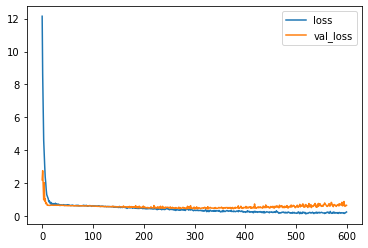

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [32]:
predictions = model.predict_classes(X_test)

/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[35 19]
 [10 86]]


              precision    recall  f1-score   support

           0       0.78      0.65      0.71        54
           1       0.82      0.90      0.86        96

    accuracy                           0.81       150
   macro avg       0.80      0.77      0.78       150
weighted avg       0.80      0.81      0.80       150



for tensorboard: use command: tensorboard --logdir logs\fit 

Try 2: Add Early Stopping + Tensorboard

In [34]:
model = Sequential()
model.add(Dense(units=101, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop, board], verbose=0)


Epoch 00039: early stopping


<AxesSubplot:>

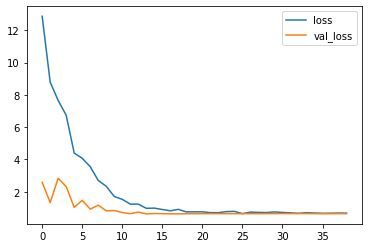

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [37]:
predictions = model.predict_classes(X_test)


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))


[[ 0 54]
 [ 0 96]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.64      1.00      0.78        96

    accuracy                           0.64       150
   macro avg       0.32      0.50      0.39       150
weighted avg       0.41      0.64      0.50       150



/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Trying to decrease complexity

In [39]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [40]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop, board], verbose=0)

Epoch 00407: early stopping


<AxesSubplot:>

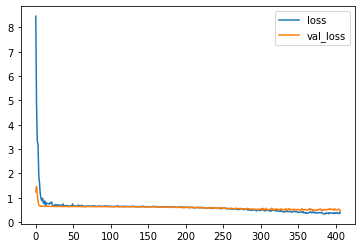

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [42]:
predictions = model.predict_classes(X_test)

/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        54
           1       0.80      0.88      0.84        96

    accuracy                           0.78       150
   macro avg       0.77      0.74      0.75       150
weighted avg       0.78      0.78      0.77       150



[[33 21]
 [12 84]]


## Increasing Complexity

In [44]:
model = Sequential()
model.add(Dense(units=202, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=101, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop, board], verbose=0)


Epoch 00357: early stopping


<AxesSubplot:>

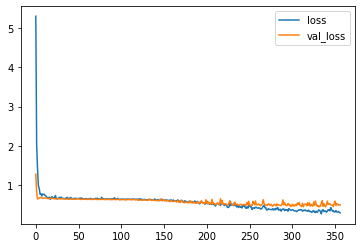

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [47]:
predictions = model.predict_classes(X_test)

/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        54
           1       0.86      0.80      0.83        96

    accuracy                           0.79       150
   macro avg       0.77      0.78      0.77       150
weighted avg       0.79      0.79      0.79       150



[[41 13]
 [19 77]]


## Increasing Complexity even more

In [49]:
model = Sequential()
model.add(Dense(units=202, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=101, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [50]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop, board], verbose=0)


Epoch 00029: early stopping


<AxesSubplot:>

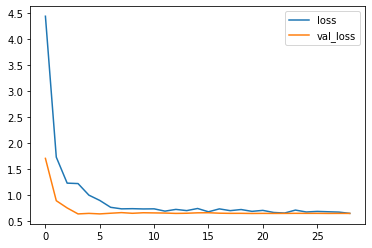

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [52]:
predictions = model.predict_classes(X_test)

/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [53]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.64      1.00      0.78        96

    accuracy                           0.64       150
   macro avg       0.32      0.50      0.39       150
weighted avg       0.41      0.64      0.50       150



[[ 0 54]
 [ 0 96]]


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cross Validation Attempt

In [6]:
def create_baseline():
    model = Sequential()
    model.add(Dense(units=101, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=["accuracy"])
    return model


In [4]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [18]:
estimator = KerasClassifier(build_fn=create_baseline, batch_size=5, epochs=100, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/100
82/82 [==============================] - 1s 1ms/step - loss: 9.6863 - accuracy: 0.5258
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 4.4921 - accuracy: 0.5160
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 2.0056 - accuracy: 0.5405
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0272 - accuracy: 0.5921
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.5577
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.5528
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.5774
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.6044
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6143
Epoch 10/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6192
Epoch 11/

Baseline: 75.52% (3.69%)

In [19]:
results

array([0.76086956, 0.69565219, 0.69565219, 0.77777779, 0.75555557,
       0.75555557, 0.77777779, 0.73333335, 0.77777779, 0.82222223])

## Trying with 350 epochs

In [23]:
estimator = KerasClassifier(
    build_fn=create_baseline, batch_size=5, epochs=350, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/350
82/82 [==============================] - 1s 2ms/step - loss: 7.1933 - accuracy: 0.5381
Epoch 2/350
82/82 [==============================] - 0s 2ms/step - loss: 2.8719 - accuracy: 0.5405
Epoch 3/350
82/82 [==============================] - 0s 2ms/step - loss: 1.3369 - accuracy: 0.5602
Epoch 4/350
82/82 [==============================] - 0s 2ms/step - loss: 0.9409 - accuracy: 0.5872
Epoch 5/350
82/82 [==============================] - 0s 2ms/step - loss: 0.7711 - accuracy: 0.5848
Epoch 6/350
82/82 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.5971
Epoch 7/350
82/82 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.5774
Epoch 8/350
82/82 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.6069
Epoch 9/350
82/82 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6143
Epoch 10/350
82/82 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6143
Epoch 11/

Baseline: 77.69% (4.97%)

## Adding Scaler

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [26]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=350, batch_size=5, callbacks=[board], verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))


Epoch 1/350
82/82 [==============================] - 1s 4ms/step - loss: 0.6010 - accuracy: 0.6683
Epoch 2/350
82/82 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8059
Epoch 3/350
82/82 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8698
Epoch 4/350
82/82 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8943
Epoch 5/350
82/82 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9484
Epoch 6/350
82/82 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9238
Epoch 7/350
82/82 [==============================] - 0s 3ms/step - loss: 0.1675 - accuracy: 0.9337
Epoch 8/350
82/82 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9607
Epoch 9/350
82/82 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9631
Epoch 10/350
82/82 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9877
Epoch 11/

Standardized: 79.47% (2.81%)

## Smaller/More simple network

In [28]:
# smaller model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(50, input_dim=101, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(25, input_dim=101, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
	return model


In [29]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller,
                  epochs=350, batch_size=5, callbacks=[board], verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" %
      (results.mean()*100, results.std()*100))


Standardized: 78.13% (6.32%)
